In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read and Transform the data

Before read the xlsx, I transform it in excel. I create a column named "Año" with the year of each match. I made it thanks to the first column which has the season when matches were played

In [58]:
lebron_points = pd.read_excel('Lebron_Points.xlsx')
print(lebron_points.head())

    Año  MatchDate Rival       Result Win/Lost Min  \
0  2018  Mié. 11/4    NY   ['110-98']    ['P']  11   
1  2018   Lun. 9/4    NY  ['123-109']    ['G']  39   
2  2018   Vie. 6/4   PHI  ['132-130']    ['P']  40   
3  2018   Jue. 5/4   WSH  ['119-115']    ['G']  39   
4  2018   Mar. 3/4   TOR  ['112-106']    ['G']  37   

  FG (Shoots try and effective)  FG % 3PTS  3PT% FT (Free shot)  FT%  \
0                           4-9  44.4  0-2   0.0            2-3  667   
1                          7-16  43.8  3-6  50.0           9-10  900   
2                         17-29  58.6  4-8  50.0           6-11  545   
3                         12-20  60.0  2-7  28.6           7-10  700   
4                          8-14  57.1  3-6  50.0           8-11  727   

   Receptions  Assists  BLK(Tapones)  STL(Recoveries)  PF(Personal Faults)  \
0           5        2             0                1                  0.0   
1           6       11             0                1                  2.0   
2       

In [59]:
rows_to_drop = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december', 'Promedios', 'Totales']
pattern = '|'.join(rows_to_drop)
lebron_points = lebron_points[~lebron_points['MatchDate'].str.contains(pattern, case=False, na=False)]

#### Control the Nulls

In [60]:
#Columns with null
null_counts = lebron_points.isnull().sum()
null_counts = null_counts[null_counts > 0]
print(null_counts)

PTS    6
dtype: int64


We drop the nulls. They are unnecessary, they are one row each year with no information

In [61]:
lebron_points = lebron_points.dropna()

#### Control de column types and content

In [62]:
print(lebron_points.info())

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 423
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Año                            367 non-null    int64  
 1   MatchDate                      367 non-null    object 
 2   Rival                          367 non-null    object 
 3   Result                         367 non-null    object 
 4   Win/Lost                       367 non-null    object 
 5   Min                            367 non-null    object 
 6   FG (Shoots try and effective)  367 non-null    object 
 7   FG %                           367 non-null    object 
 8   3PTS                           367 non-null    object 
 9   3PT%                           367 non-null    object 
 10  FT (Free shot)                 367 non-null    object 
 11  FT%                            367 non-null    int64  
 12  Receptions                     367 non-null    int64  


In [63]:
display(lebron_points)

,Año,MatchDate,Rival,Result,Win/Lost,Min,FG (Shoots try and effective),FG %,3PTS,3PT%,FT (Free shot),FT%,Receptions,Assists,BLK(Tapones),STL(Recoveries),PF(Personal Faults),TO(Ball Lost),PTS
0,2018,Mié. 11/4,NY,['110-98'],['P'],11,4-9,44.4,0-2,0.0,2-3,667,5,2,0,1,0.0,3.0,10.0
1,2018,Lun. 9/4,NY,['123-109'],['G'],39,7-16,43.8,3-6,50.0,9-10,900,6,11,0,1,2.0,4.0,26.0
2,2018,Vie. 6/4,PHI,['132-130'],['P'],40,17-29,58.6,4-8,50.0,6-11,545,11,11,1,2,0.0,8.0,44.0
3,2018,Jue. 5/4,WSH,['119-115'],['G'],39,12-20,60.0,2-7,28.6,7-10,700,9,14,0,0,2.0,6.0,33.0
4,2018,Mar. 3/4,TOR,['112-106'],['G'],37,8-14,57.1,3-6,50.0,8-11,727,10,6,0,0,2.0,5.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,2023,Jue. 26/10,PHX,['100-95'],['G'],35,7-14,50.0,1-5,20.0,6-8,750,8,9,2,2,1.0,5.0,21.0
417,2023,Mar. 24/10,DEN,['119-107'],['P'],29,10-16,62.5,1-4,25.0,0-1,0,8,5,0,1,1.0,0.0,21.0
421,2023,Jue. 19/10,PHX,['123-100'],['P'],22,6-12,50.0,3-5,60.0,4-5,800,6,3,0,0,2.0,1.0,19.0
422,2023,Vie. 13/10,GS,['129-125'],['P'],18,4-8,50.0,1-3,33.3,3-6,500,2,5,0,0,0.0,2.0,12.0


1st) We create a new binary column. 1 if Lebron win the match, 0 if he loses

In [64]:
# Crear una nueva columna 'WinBinary' que tome el valor 1 si Win/Lost es ['G'] y 0 en otro caso
lebron_points['WinBinary'] = lebron_points['Win/Lost'].apply(lambda x: 1 if x == "['G']" else 0)
lebron_points = lebron_points.drop(columns='Win/Lost')


2nd) We create a new column with the Lebron Team's points

In [65]:
# Filtrar el DataFrame para eliminar las filas donde 'Result' es exactamente "['G']"
lebron_points = lebron_points[lebron_points['Result'] != "['G']"]
# Filtrar el DataFrame para eliminar las filas donde 'Result' es exactamente "['P']"
lebron_points = lebron_points[lebron_points['Result'] != "['P']"]

In [66]:
# Eliminar caracteres sobrantes [' y '], y también el indicador de tiempo extra ' TE' si existe
lebron_points['CleanedResult'] = lebron_points['Result'].str.replace(r"[\'\[\]]", "", regex=True).str.replace(" TE", "").str.replace(" 3TE", "").str.replace(" 2TE", "").str.replace("P", "")

# Dividir el resultado limpio en dos columnas: LocalPoints y VisitorPoints
lebron_points[['LocalPoints', 'VisitorPoints']] = lebron_points['CleanedResult'].str.split('-', expand=True).astype(int)

# Crear la nueva columna 'LebronTeamPoints' con la lógica actualizada
lebron_points['LebronTeamPoints'] = lebron_points.apply(
    lambda row: row['LocalPoints'] if row['WinBinary'] == 0 else row['VisitorPoints'],
    axis=1
)

In [67]:
# Eliminar caracteres sobrantes [' y '], y también el indicador de tiempo extra ' TE' si existe
lebron_points['CleanedResult'] = lebron_points['Result'].str.replace(r"[\'\[\]]", "", regex=True).str.replace(" TE", "").str.replace(" 3TE", "").str.replace(" 2TE", "")

# Dividir el resultado limpio en dos columnas: LocalPoints y VisitorPoints
lebron_points[['LocalPoints', 'VisitorPoints']] = lebron_points['CleanedResult'].str.split('-', expand=True).astype(int)

# Crear la nueva columna 'LebronTeamPoints' con la lógica actualizada
lebron_points['OtherTeamPoints'] = lebron_points.apply(
    lambda row: row['LocalPoints'] if row['WinBinary'] == 1 else row['VisitorPoints'],
    axis=1
)

# Opcional: eliminar la columna temporal 'CleanedResult'
lebron_points = lebron_points.drop(columns=['CleanedResult'])
lebron_points = lebron_points.drop(columns=['Result'])

Now, we are going to create a column to know if he play as local or as visitor

In [68]:
# Crear la nueva columna Local_Binary según la lógica especificada
lebron_points['Local_Binary'] = lebron_points.apply(
    lambda row: 1 if (row['LocalPoints'] > row['VisitorPoints'] and row['WinBinary'] == 1) or
                      (row['LocalPoints'] < row['VisitorPoints'] and row['WinBinary'] == 0) 
                else 0,
    axis=1
)



Now, we are going to create some columns to separate the shoots attempted and made

In [69]:
print(lebron_points.columns)

Index(['Año', 'MatchDate', 'Rival', 'Min', 'FG (Shoots try and effective)',
       'FG %', '3PTS', '3PT%', 'FT (Free shot)', 'FT%', 'Receptions',
       'Assists', 'BLK(Tapones)', 'STL(Recoveries)', 'PF(Personal Faults)',
       'TO(Ball Lost)', 'PTS', 'WinBinary', 'LocalPoints', 'VisitorPoints',
       'LebronTeamPoints', 'OtherTeamPoints', 'Local_Binary'],
      dtype='object')


In [70]:
# 1. Separar los valores en FG, FT y 3PTS
lebron_points[['FG_made', 'FG_attempted']] = lebron_points['FG (Shoots try and effective)'].str.split('-', expand=True)
lebron_points[['FT_made', 'FT_attempted']] = lebron_points['FT (Free shot)'].str.split('-', expand=True)
lebron_points[['3PTS_made', '3PTS_attempted']] = lebron_points['3PTS'].str.split('-', expand=True)

# 2. Convertir a enteros
lebron_points[['FG_made', 'FG_attempted', 'FT_made', 'FT_attempted', '3PTS_made', '3PTS_attempted']] = \
    lebron_points[['FG_made', 'FG_attempted', 'FT_made', 'FT_attempted', '3PTS_made', '3PTS_attempted']].astype(int)

lebron_points = lebron_points.drop(columns=['FG (Shoots try and effective)'])
lebron_points = lebron_points.drop(columns=['FT (Free shot)'])
lebron_points = lebron_points.drop(columns=['3PTS'])


Let's study why some columns are "object"

In [71]:
# We change the % columns for floats
lebron_points['FG %'] = lebron_points['FG %'].astype(float) / 100
lebron_points['3PT%'] = lebron_points['3PT%'].astype(float) / 100

In [72]:
# Now, I am going to change the columns year and date for a unique date with de match date

lebron_points['MatchDate'] = lebron_points['MatchDate'].str.split().str[1]

# 2. Crear una columna de fecha concatenando el formato día/mes/año
lebron_points['Fecha'] = lebron_points['MatchDate'] + '/' + lebron_points['Año'].astype(str)

# 3. Convertir a formato datetime en AAAA-MM-DD
lebron_points['Fecha'] = pd.to_datetime(lebron_points['Fecha'], format='%d/%m/%Y')


In [73]:
lebron_points = lebron_points.drop(columns='MatchDate')

## EDA

In [74]:
display(lebron_points.describe())

,Año,FG %,3PT%,FT%,Receptions,Assists,BLK(Tapones),STL(Recoveries),PF(Personal Faults),TO(Ball Lost),...,LebronTeamPoints,OtherTeamPoints,Local_Binary,FG_made,FG_attempted,FT_made,FT_attempted,3PTS_made,3PTS_attempted,Fecha
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367
mean,2020.735695,0.521025,0.340428,716.444142,8.103542,7.738420,0.711172,1.212534,1.623978,3.637602,...,113.574932,114.130790,0.550409,10.231608,19.615804,4.547684,6.242507,2.168937,6.024523,2021-03-17 23:32:32.043596800
min,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,83.000000,75.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,2017-10-17 00:00:00
25%,2018.000000,0.450000,0.200000,600.000000,6.000000,6.000000,0.000000,0.000000,1.000000,2.000000,...,105.000000,106.000000,0.000000,8.000000,17.000000,3.000000,4.000000,1.000000,4.000000,2018-11-19 12:00:00
50%,2021.000000,0.526000,0.333000,727.000000,8.000000,7.000000,1.000000,1.000000,1.000000,3.000000,...,113.000000,114.000000,1.000000,10.000000,20.000000,4.000000,6.000000,2.000000,6.000000,2021-11-24 00:00:00
75%,2023.000000,0.589500,0.500000,875.000000,10.000000,10.000000,1.000000,2.000000,2.000000,5.000000,...,122.000000,122.000000,1.000000,13.000000,23.000000,6.000000,8.000000,3.000000,8.000000,2023-01-29 12:00:00
max,2024.000000,0.846000,1.000000,1000.000000,20.000000,19.000000,4.000000,6.000000,5.000000,11.000000,...,148.000000,150.000000,1.000000,23.000000,34.000000,13.000000,15.000000,9.000000,14.000000,2024-04-16 00:00:00
std,2.314933,0.106202,0.208257,228.041966,3.124059,3.125293,0.848309,1.156382,1.239281,1.800729,...,12.442182,12.373703,0.498132,3.193792,4.704616,2.611929,3.149038,1.647590,2.511601,NaN


In [75]:
# The FT% column is x1000. We divide it :1000
lebron_points['FT%'] = lebron_points['FT%'] / 1000

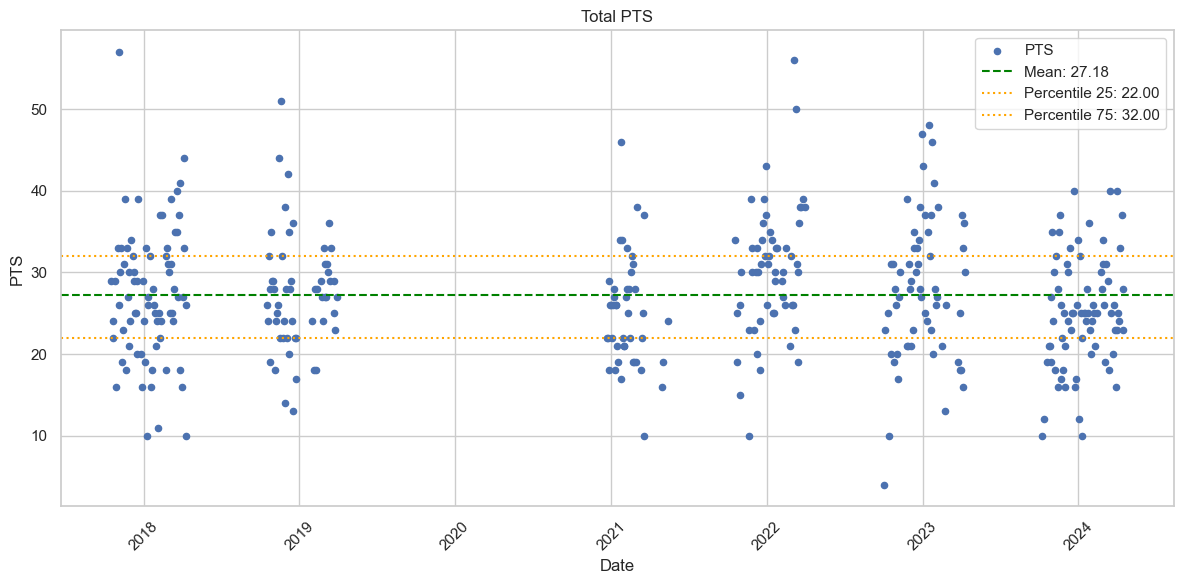

In [76]:
# Calcular la media, el percentil 25 y el percentil 75
mean_pts = lebron_points['PTS'].mean()
percentile_25 = lebron_points['PTS'].quantile(0.25)
percentile_75 = lebron_points['PTS'].quantile(0.75)

# Configurar el estilo de seaborn para una visualización más clara
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 6))
plt.scatter(lebron_points['Fecha'], lebron_points['PTS'], color='b', s=20, label="PTS")  # s es el tamaño de los puntos

# Añadir línea de la media
plt.axhline(mean_pts, color='green', linestyle='--', linewidth=1.5, label=f'Mean: {mean_pts:.2f}')

# Añadir líneas de percentiles
plt.axhline(percentile_25, color='orange', linestyle=':', linewidth=1.5, label=f'Percentile 25: {percentile_25:.2f}')
plt.axhline(percentile_75, color='orange', linestyle=':', linewidth=1.5, label=f'Percentile 75: {percentile_75:.2f}')

# Añadir títulos y etiquetas
plt.title('Total PTS')
plt.xlabel('Date')
plt.ylabel('PTS')

# Rotar las etiquetas de la fecha en el eje x para mejor visibilidad
plt.xticks(rotation=45)

# Mostrar leyenda y ajustar el layout
plt.legend()
plt.tight_layout()

# Mostrar el gráfico
plt.show()

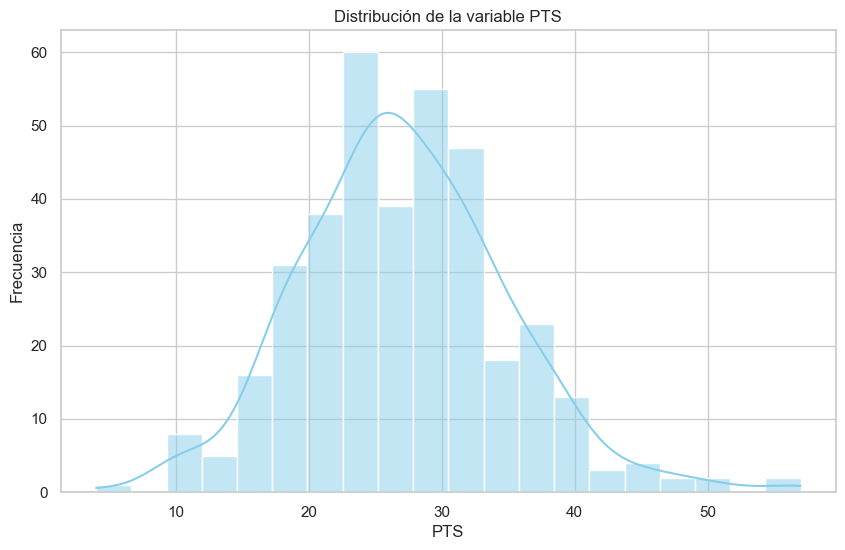

In [77]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear una figura para el histograma
plt.figure(figsize=(10, 6))
sns.histplot(lebron_points['PTS'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de la variable PTS')
plt.xlabel('PTS')
plt.ylabel('Frecuencia')
plt.show()

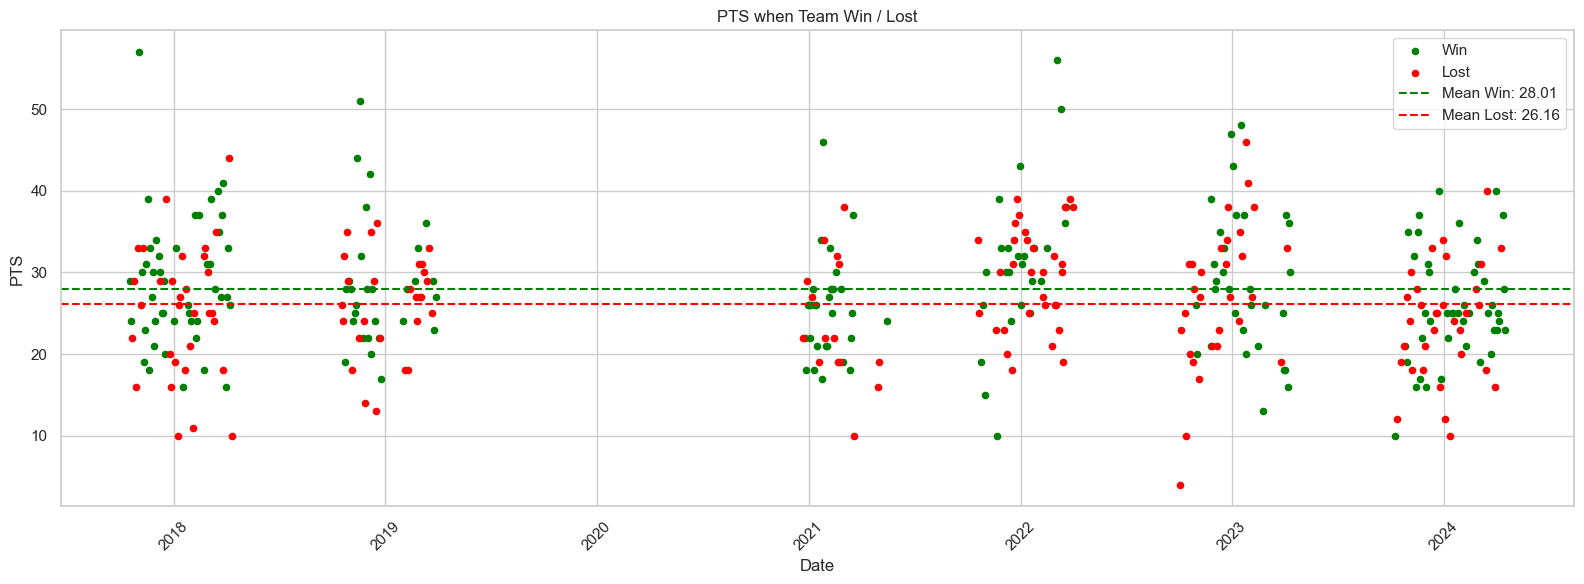

In [78]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear la figura
fig, ax = plt.subplots(figsize=(16, 6))

# Gráfico 1: Diferenciando victorias y derrotas
ax.scatter(
    lebron_points[lebron_points['WinBinary'] == 1]['Fecha'], 
    lebron_points[lebron_points['WinBinary'] == 1]['PTS'], 
    color='green', s=20, label="Win"
)
ax.scatter(
    lebron_points[lebron_points['WinBinary'] == 0]['Fecha'], 
    lebron_points[lebron_points['WinBinary'] == 0]['PTS'], 
    color='red', s=20, label="Lost"
)

# Calcular y dibujar las medias para victorias y derrotas
mean_win_pts = lebron_points[lebron_points['WinBinary'] == 1]['PTS'].mean()
mean_loss_pts = lebron_points[lebron_points['WinBinary'] == 0]['PTS'].mean()
ax.axhline(mean_win_pts, color='green', linestyle='--', linewidth=1.5, label=f'Mean Win: {mean_win_pts:.2f}')
ax.axhline(mean_loss_pts, color='red', linestyle='--', linewidth=1.5, label=f'Mean Lost: {mean_loss_pts:.2f}')

# Configurar etiquetas y leyenda del gráfico
ax.set_title('PTS when Team Win / Lost')
ax.set_xlabel('Date')
ax.set_ylabel('PTS')
ax.legend()
ax.tick_params(axis='x', rotation=45)

# Ajustar layout y mostrar gráfico
plt.tight_layout()
plt.show()


In [79]:
display(lebron_points.describe())

,Año,FG %,3PT%,FT%,Receptions,Assists,BLK(Tapones),STL(Recoveries),PF(Personal Faults),TO(Ball Lost),...,LebronTeamPoints,OtherTeamPoints,Local_Binary,FG_made,FG_attempted,FT_made,FT_attempted,3PTS_made,3PTS_attempted,Fecha
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367
mean,2020.735695,0.521025,0.340428,0.716444,8.103542,7.738420,0.711172,1.212534,1.623978,3.637602,...,113.574932,114.130790,0.550409,10.231608,19.615804,4.547684,6.242507,2.168937,6.024523,2021-03-17 23:32:32.043596800
min,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,83.000000,75.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,2017-10-17 00:00:00
25%,2018.000000,0.450000,0.200000,0.600000,6.000000,6.000000,0.000000,0.000000,1.000000,2.000000,...,105.000000,106.000000,0.000000,8.000000,17.000000,3.000000,4.000000,1.000000,4.000000,2018-11-19 12:00:00
50%,2021.000000,0.526000,0.333000,0.727000,8.000000,7.000000,1.000000,1.000000,1.000000,3.000000,...,113.000000,114.000000,1.000000,10.000000,20.000000,4.000000,6.000000,2.000000,6.000000,2021-11-24 00:00:00
75%,2023.000000,0.589500,0.500000,0.875000,10.000000,10.000000,1.000000,2.000000,2.000000,5.000000,...,122.000000,122.000000,1.000000,13.000000,23.000000,6.000000,8.000000,3.000000,8.000000,2023-01-29 12:00:00
max,2024.000000,0.846000,1.000000,1.000000,20.000000,19.000000,4.000000,6.000000,5.000000,11.000000,...,148.000000,150.000000,1.000000,23.000000,34.000000,13.000000,15.000000,9.000000,14.000000,2024-04-16 00:00:00
std,2.314933,0.106202,0.208257,0.228042,3.124059,3.125293,0.848309,1.156382,1.239281,1.800729,...,12.442182,12.373703,0.498132,3.193792,4.704616,2.611929,3.149038,1.647590,2.511601,NaN


Now, we are going to analyze the Lebron's points ratios.

In [80]:
# Calcular ratios de estadísticas adicionales por año

# Crear el DataFrame 'yearly_summary' que ya contiene el ratio de victorias y derrotas
yearly_summary = lebron_points.groupby('Año').agg(
    victories=('WinBinary', 'sum'),       # Número de victorias
    total_games=('WinBinary', 'count'),   # Total de juegos en el año
    # Tiros de 3 puntos metidos e intentados
    three_points_made=('3PTS_made', 'sum'),
    three_points_attempted=('3PTS_attempted', 'sum'),
    # Tiros libres metidos e intentados
    free_throws_made=('FT_made', 'sum'),
    free_throws_attempted=('FT_attempted', 'sum'),
    # Puntos de LeBron y puntos del equipo en total
    lebron_points=('PTS', 'sum'),
    team_points=('LebronTeamPoints', 'sum')
)

# Añadir ratios al 'yearly_summary'
yearly_summary['victory_ratio'] = yearly_summary['victories'] / yearly_summary['total_games']
yearly_summary['three_point_ratio'] = yearly_summary['three_points_made'] / yearly_summary['three_points_attempted']
yearly_summary['free_throw_ratio'] = yearly_summary['free_throws_made'] / yearly_summary['free_throws_attempted']
yearly_summary['lebron_team_points_ratio'] = yearly_summary['lebron_points'] / yearly_summary['team_points']

# Mostrar el resultado
print("Resumen anual con ratios adicionales:")
print(yearly_summary[['victory_ratio', 'three_point_ratio', 'free_throw_ratio', 'lebron_team_points_ratio']])



Resumen anual con ratios adicionales:
      victory_ratio  three_point_ratio  free_throw_ratio  \
Año                                                        
2017       0.656250           0.379518          0.767196   
2018       0.564103           0.356608          0.692708   
2019       0.380952           0.316176          0.636364   
2020       0.600000           0.354839          0.714286   
2021       0.609375           0.369955          0.726519   
2022       0.380952           0.329694          0.750000   
2023       0.571429           0.372340          0.762533   
2024       0.658537           0.406091          0.761702   

      lebron_team_points_ratio  
Año                             
2017                  0.260514  
2018                  0.243029  
2019                  0.232287  
2020                  0.215074  
2021                  0.244352  
2022                  0.249188  
2023                  0.228513  
2024                  0.218028  


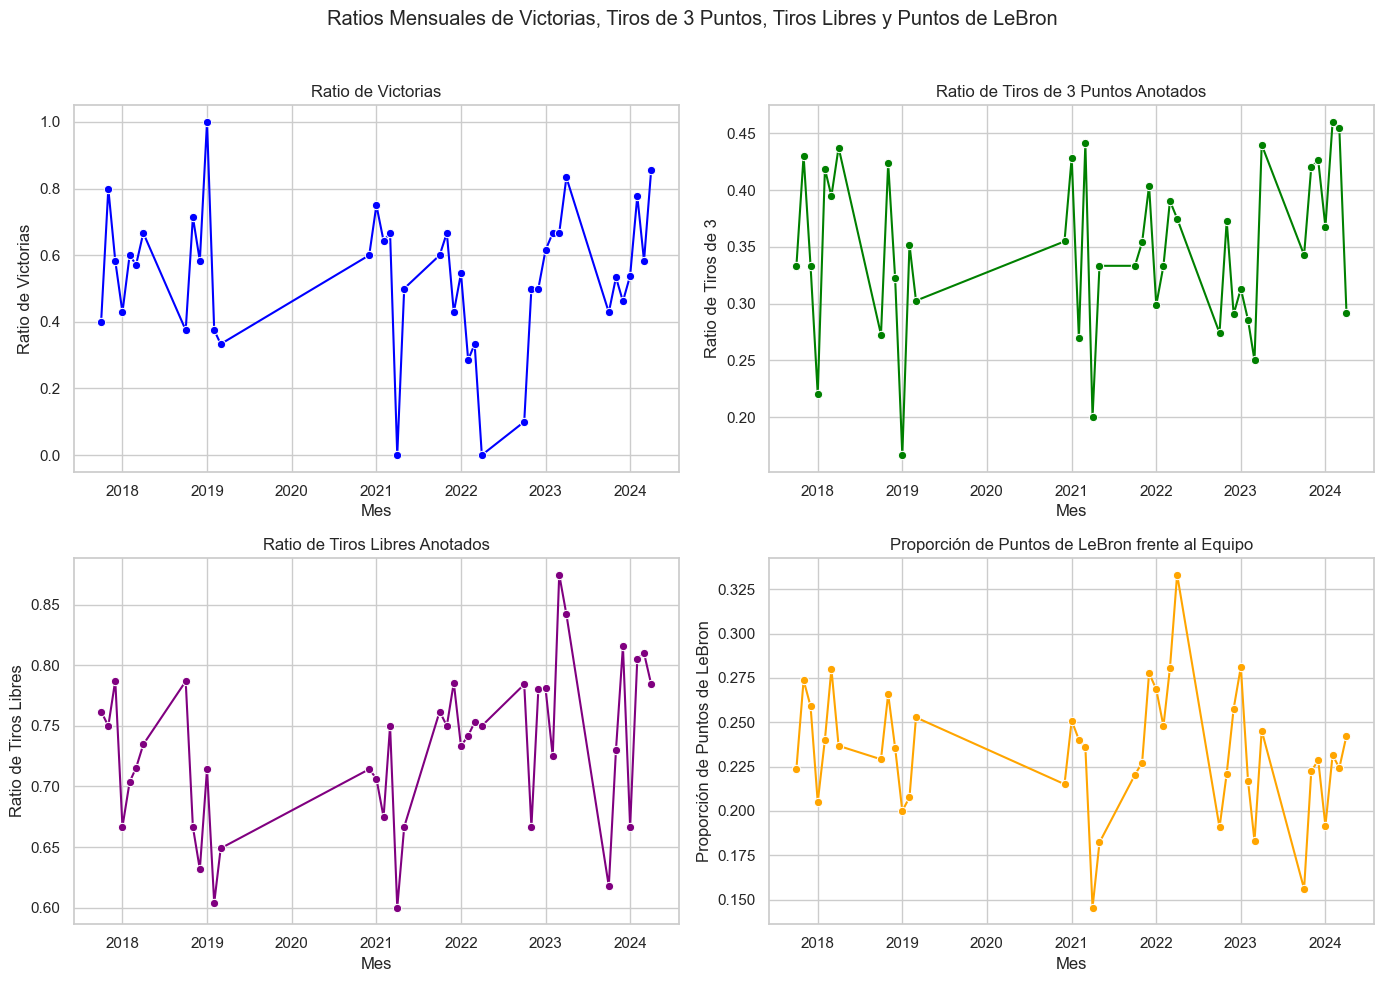

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurar que la columna 'Fecha' es de tipo datetime
lebron_points['Fecha'] = pd.to_datetime(lebron_points['Fecha'])

# Crear columna 'AñoMes' para agrupar por mes
lebron_points['AñoMes'] = lebron_points['Fecha'].dt.to_period('M')

# Calcular ratios de estadísticas adicionales por mes
monthly_summary = lebron_points.groupby('AñoMes').agg(
    victories=('WinBinary', 'sum'),       # Número de victorias
    total_games=('WinBinary', 'count'),   # Total de juegos en el mes
    # Tiros de 3 puntos metidos e intentados
    three_points_made=('3PTS_made', 'sum'),
    three_points_attempted=('3PTS_attempted', 'sum'),
    # Tiros libres metidos e intentados
    free_throws_made=('FT_made', 'sum'),
    free_throws_attempted=('FT_attempted', 'sum'),
    # Puntos de LeBron y puntos del equipo en total
    lebron_points=('PTS', 'sum'),
    team_points=('LebronTeamPoints', 'sum')
).reset_index()

# Añadir ratios al 'monthly_summary'
monthly_summary['victory_ratio'] = monthly_summary['victories'] / monthly_summary['total_games']
monthly_summary['three_point_ratio'] = monthly_summary['three_points_made'] / monthly_summary['three_points_attempted']
monthly_summary['free_throw_ratio'] = monthly_summary['free_throws_made'] / monthly_summary['free_throws_attempted']
monthly_summary['lebron_team_points_ratio'] = monthly_summary['lebron_points'] / monthly_summary['team_points']

# Convertir 'AñoMes' a formato datetime para graficar
monthly_summary['AñoMes'] = monthly_summary['AñoMes'].dt.to_timestamp()

# Configurar estilo
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Ratios Mensuales de Victorias, Tiros de 3 Puntos, Tiros Libres y Puntos de LeBron')

# Graficar cada ratio en su propio gráfico
sns.lineplot(ax=axes[0, 0], x='AñoMes', y='victory_ratio', data=monthly_summary, color='blue', marker='o')
axes[0, 0].set_title('Ratio de Victorias')
axes[0, 0].set_xlabel('Mes')
axes[0, 0].set_ylabel('Ratio de Victorias')

sns.lineplot(ax=axes[0, 1], x='AñoMes', y='three_point_ratio', data=monthly_summary, color='green', marker='o')
axes[0, 1].set_title('Ratio de Tiros de 3 Puntos Anotados')
axes[0, 1].set_xlabel('Mes')
axes[0, 1].set_ylabel('Ratio de Tiros de 3')

sns.lineplot(ax=axes[1, 0], x='AñoMes', y='free_throw_ratio', data=monthly_summary, color='purple', marker='o')
axes[1, 0].set_title('Ratio de Tiros Libres Anotados')
axes[1, 0].set_xlabel('Mes')
axes[1, 0].set_ylabel('Ratio de Tiros Libres')

sns.lineplot(ax=axes[1, 1], x='AñoMes', y='lebron_team_points_ratio', data=monthly_summary, color='orange', marker='o')
axes[1, 1].set_title('Proporción de Puntos de LeBron frente al Equipo')
axes[1, 1].set_xlabel('Mes')
axes[1, 1].set_ylabel('Proporción de Puntos de LeBron')

# Ajustar los espacios entre gráficos
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Añadir margen para el título
plt.show()


## FEATURE ENGINEERING

We cannot predict the match PTS with the Match stats, because if we want to predict next match, we don't know the stats for the game.
So, firstly, we are going to "move" the target one match, i.e. with the data for the previous match, try to predict the next.
After that, we are going to take the mean for the features of the last 4 matches, and the ratios, to predict the next match.
These are the tecniques we are going to use in order to prepare the data for the models

In [82]:
# Filtrar todas las columnas numéricas en el DataFrame
numeric_feature_columns = lebron_points.select_dtypes(include='number').columns

# Definir el tamaño de la ventana
window_size = 4

# Calcular la media de los últimos 4 partidos para cada columna numérica
for col in numeric_feature_columns:
    lebron_points[f'{col}_rolling_mean_{window_size}'] = lebron_points[col].rolling(window=window_size).mean()

# Eliminar las primeras filas con NaN generadas por el desplazamiento de la ventana
lebron_points = lebron_points.dropna().reset_index(drop=True)

# Verificar el resultado
print(lebron_points.head())

    Año Rival Min   FG %   3PT%    FT%  Receptions  Assists  BLK(Tapones)  \
0  2018   WSH  39  0.600  0.286  0.700           9       14             0   
1  2018   TOR  37  0.571  0.500  0.727          10        6             0   
2  2018   DAL  39  0.238  0.667  1.000          13       12             0   
3  2018   CHA  37  0.538  0.500  0.818          10        8             0   
4  2018   MIA  38  0.389  0.000  0.800           6        7             0   

   STL(Recoveries)  ...  VisitorPoints_rolling_mean_4  \
0                0  ...                        113.00   
1                0  ...                        115.00   
2                0  ...                        109.50   
3                1  ...                        103.25   
4                0  ...                         94.25   

   LebronTeamPoints_rolling_mean_4  OtherTeamPoints_rolling_mean_4  \
0                           116.50                          117.50   
1                           115.50                    

In [83]:
# 1. Crear ratios para cada partido y añadirlos al DataFrame
lebron_points['three_point_ratio'] = lebron_points['3PTS_made'] / lebron_points['3PTS_attempted']
lebron_points['free_throw_ratio'] = lebron_points['FT_made'] / lebron_points['FT_attempted']
lebron_points['lebron_team_points_ratio'] = lebron_points['PTS'] / lebron_points['LebronTeamPoints']

# Evitar posibles divisiones por cero y convertir inf a NaN
lebron_points.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

# 2. Calcular medias de los últimos 4 partidos para los ratios
ratios = ['three_point_ratio', 'free_throw_ratio', 'lebron_team_points_ratio']
window_size = 4

for ratio in ratios:
    lebron_points[f'{ratio}_rolling_mean_{window_size}'] = lebron_points[ratio].rolling(window=window_size).mean()

# 3. Eliminar filas iniciales con NaN debido al desplazamiento o divisiones
lebron_points = lebron_points.dropna().reset_index(drop=True)

# Verificar el resultado final
print(lebron_points.head())


    Año Rival Min   FG %   3PT%    FT%  Receptions  Assists  BLK(Tapones)  \
0  2018   CHA  37  0.538  0.500  0.818          10        8             0   
1  2018   MIA  38  0.389  0.000  0.800           6        7             0   
2  2018   BKN  38  0.737  0.250  0.800          10        8             0   
3  2018   PHX  29  0.688  0.250  0.667           6        9             1   
4  2018   TOR  39  0.579  0.333  0.857           7       17             0   

   STL(Recoveries)  ...  FT_made_rolling_mean_4  FT_attempted_rolling_mean_4  \
0                1  ...                    7.00                         9.00   
1                0  ...                    6.25                         7.75   
2                1  ...                    6.25                         7.50   
3                1  ...                    6.25                         8.00   
4                1  ...                    7.00                         8.75   

   3PTS_made_rolling_mean_4  3PTS_attempted_rolling_mean

In [84]:
# Ordenar el DataFrame cronológicamente, de más antigua a más nueva
lebron_points = lebron_points.sort_values(by='Fecha').reset_index(drop=True)

# Desplazar la columna 'PTS' una posición hacia arriba para que represente el objetivo del próximo partido
lebron_points['PTS_next_match'] = lebron_points['PTS'].shift(-1)

# Eliminar la última fila, ya que después del desplazamiento tendrá NaN en 'PTS_next_match'
lebron_points = lebron_points.dropna().reset_index(drop=True)

# Eliminar la columna original 'PTS', ya que ahora tenemos 'PTS_next_match' como target
lebron_points = lebron_points.drop(columns=['PTS'])

# Verificar el resultado
print(lebron_points.head())


    Año Rival Min   FG %   3PT%    FT%  Receptions  Assists  BLK(Tapones)  \
0  2017   BOS  41  0.632  0.200  1.000          16        9             2   
1  2017   MIL  37  0.625  0.500  1.000           5        8             1   
2  2017   ORL  31  0.533  0.333  0.833           4        2             1   
3  2017   BKN  41  0.600  0.500  0.500          10       13             4   
4  2017    NY  39  0.467  0.250  1.000          10        7             0   

   STL(Recoveries)  ...  FT_attempted_rolling_mean_4  \
0                0  ...                         5.00   
1                1  ...                         4.25   
2                1  ...                         5.00   
3                0  ...                         5.75   
4                2  ...                         5.25   

   3PTS_made_rolling_mean_4  3PTS_attempted_rolling_mean_4  three_point_ratio  \
0                      1.25                           3.50           0.200000   
1                      1.25           

In [85]:
# Last : We delete the columns that we are not going to use
columns_to_drop = ['Fecha', 'Rival']
lebron_points = lebron_points.drop(columns=[col for col in columns_to_drop if col in lebron_points.columns])

Finally, we are going to save this table as .csv to use it for the Models

In [86]:
# Guardar el DataFrame lebron_points como un archivo CSV
lebron_points.to_csv('lebron_points_prepared.csv', index=False)